# DengAI DrivenData Competition

Data description <a href='https://dengueforecasting.noaa.gov/docs/project_description.pdf'>Here</a>

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

In [27]:
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test_features = pd.read_csv('dengue_features_test.csv')

In [4]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [6]:
def add_leading_zeros(x):
    x = str(x)
    x = x.zfill(2)
    return x

In [7]:
train_labels.total_cases.describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

In [8]:
train_labels['time'] = (train_labels.year.map(str) + train_labels.weekofyear.map(add_leading_zeros)).map(int)

In [9]:
train_labels = train_labels.sort_values('time')
train_labels.set_index('time', inplace=True)

city
iq    AxesSubplot(0.125,0.125;0.775x0.755)
sj    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_cases, dtype: object

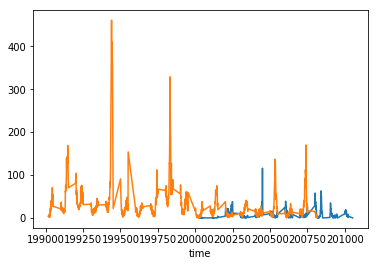

In [10]:
train_labels.groupby(['city']).total_cases.plot()

In [11]:
train_features.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

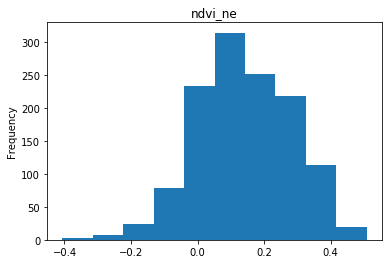

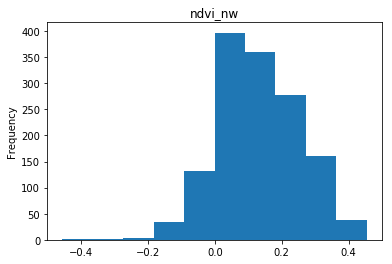

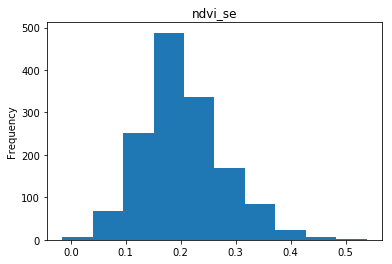

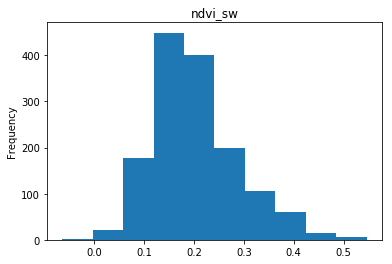

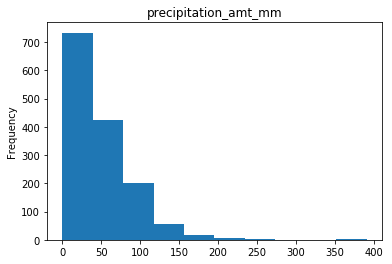

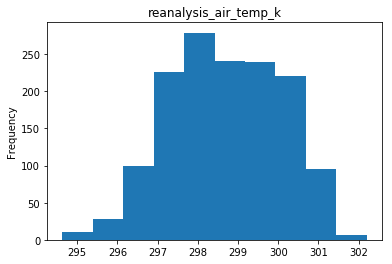

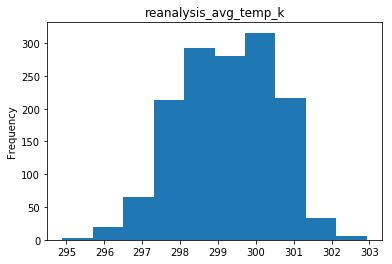

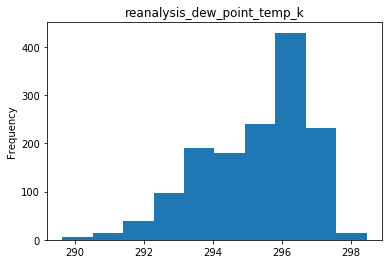

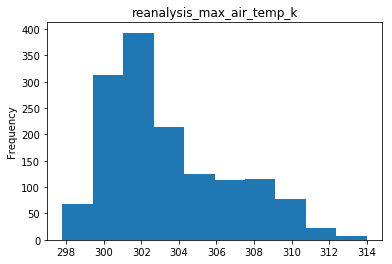

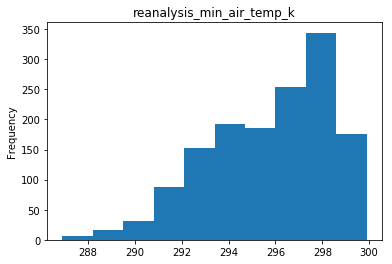

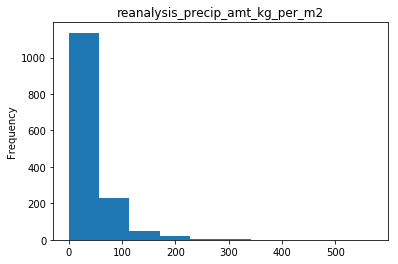

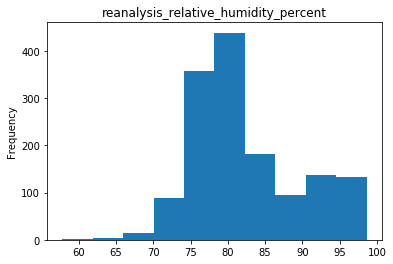

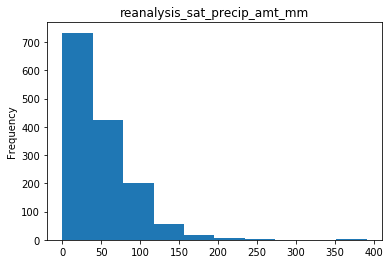

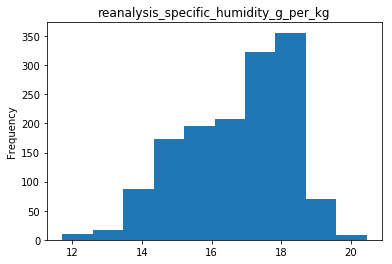

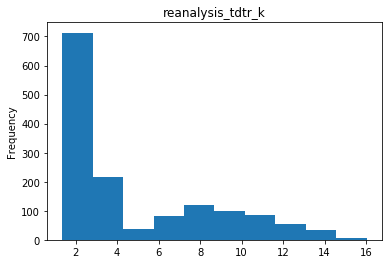

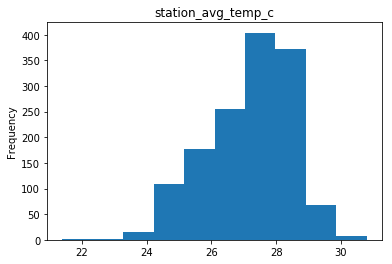

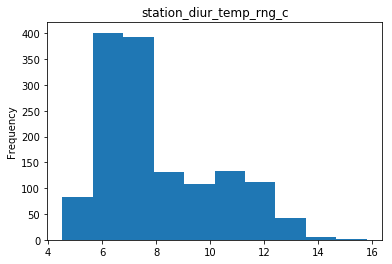

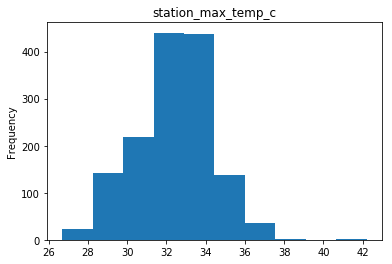

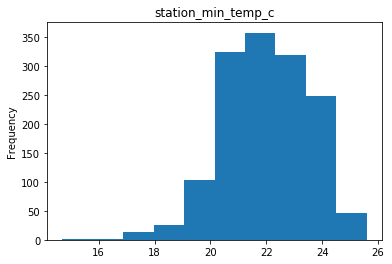

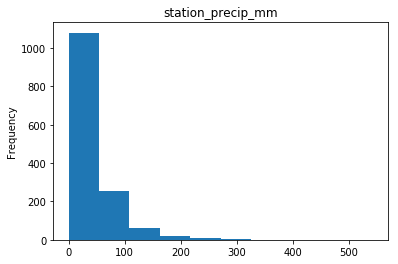

In [12]:
for c in train_features.columns[4:]:
    plt.figure(c)
    train_features[c].plot(kind='hist',title=c)

In [13]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


## Run a baseline solution

In [56]:
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test_features = pd.read_csv('dengue_features_test.csv')

In [58]:
#pks = ['city', 'year', 'weekofyear']
#training = pd.merge(train_features, train_labels, on = ['city', 'year', 'weekofyear'])

In [59]:
f_drop = ['city', 'year', 'weekofyear', 'week_start_date']
splitted_data = train_test_split(train_features.drop(f_drop, axis = 1), train_labels.total_cases, test_size=0.2)
train_data, eval_data, train_labels, eval_labels = splitted_data

In [ ]:
train_pool = Pool(data = train_data, label = train_labels)
eval_pool = Pool(data = eval_data, label = eval_labels)

In [94]:
model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=3)
model.fit(train_pool, eval_set=eval_pool, verbose = 100)
preds = model.predict(eval_data)

0:	learn: 41.4540579	test: 43.4462285	best: 43.4462285 (0)	total: 1.37ms	remaining: 1.37s
100:	learn: 23.2808669	test: 29.5430859	best: 29.5301195 (87)	total: 95ms	remaining: 846ms
200:	learn: 19.6858227	test: 29.9401064	best: 29.4526894 (104)	total: 184ms	remaining: 733ms
300:	learn: 17.3813416	test: 30.1517607	best: 29.4526894 (104)	total: 277ms	remaining: 643ms
400:	learn: 15.7141595	test: 30.3823388	best: 29.4526894 (104)	total: 369ms	remaining: 552ms
500:	learn: 14.2918844	test: 30.5081714	best: 29.4526894 (104)	total: 460ms	remaining: 458ms
600:	learn: 13.1558722	test: 30.5424913	best: 29.4526894 (104)	total: 547ms	remaining: 363ms
700:	learn: 12.1273358	test: 30.5710377	best: 29.4526894 (104)	total: 638ms	remaining: 272ms
800:	learn: 11.1766978	test: 30.6839844	best: 29.4526894 (104)	total: 734ms	remaining: 182ms
900:	learn: 10.3216788	test: 30.6810476	best: 29.4526894 (104)	total: 827ms	remaining: 90.9ms
999:	learn: 9.5392718	test: 30.7708293	best: 29.4526894 (104)	total: 914ms

In [95]:
train_metrics = model.eval_metrics(train_pool, ['RMSE'], ntree_start = model.tree_count_ - 1)
test_metrics = model.eval_metrics(eval_pool, ['RMSE'], ntree_start = model.tree_count_ - 1)

metrics = pd.DataFrame.from_dict(train_metrics)\
.append(pd.DataFrame.from_dict(test_metrics), ignore_index=True)\
.transpose().rename(columns={0:'Train', 1:'Test'})
metrics

,Train,Test
RMSE,23.10118,29.452689


In [131]:
test_pred = model.predict(test_features.drop(f_drop, axis = 1))

In [133]:
test_pred = pd.DataFrame(test_pred).rename(columns = {0:'total_cases'}).total_cases.map(round)

In [134]:
result = pd.concat([test_features[f_drop].drop('week_start_date', axis = 1), test_pred], axis = 1)

In [135]:
result

,city,year,weekofyear,total_cases
0,sj,2008,18,13
1,sj,2008,19,16
2,sj,2008,20,14
3,sj,2008,21,22
4,sj,2008,22,25
...,...,...,...,...
411,iq,2013,22,9
412,iq,2013,23,5
413,iq,2013,24,3
414,iq,2013,25,3


In [136]:
result.to_csv('output.csv', index=False)

- BEST - 27.1611
- CURRENT RANK - 2154
- COMPETITORS - 8312

## Feature Engineering

Create a model splitted by location

Calculate for last_week, last_two_weeks, last_month:
- precipitation
- temperature
- humidity

